In [1]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

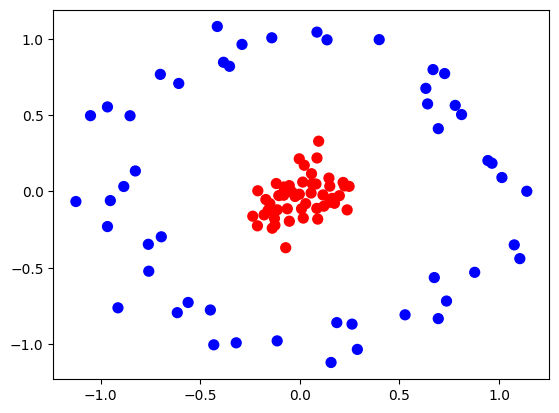

In [2]:
from sklearn.datasets._samples_generator import make_circles
X,y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='bwr')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train.ravel())
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.45

In [9]:
zero_one_colormap = ListedColormap(('blue','red'))
def plot_decision_boundry(X,y,clf):
    X_set ,y_set = X,y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                                   stop = X_set[:,0].max()+1,
                                   step=0.01),
                                   np.arange(start=X_set[:,0].min()-1,
                                   stop = X_set[:,0].max()+1,
                                   step=0.01))
    plt.contourf(X1,X2,clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
                                             alpha=0.75,
                                             cmap = zero_one_colormap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(),X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                    c=(zero_one_colormap)(i),label=j)
    plt.title('SVM decision boundry')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\sanjay\AppData\Local\Temp\ipykernel_5976\2543833994.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


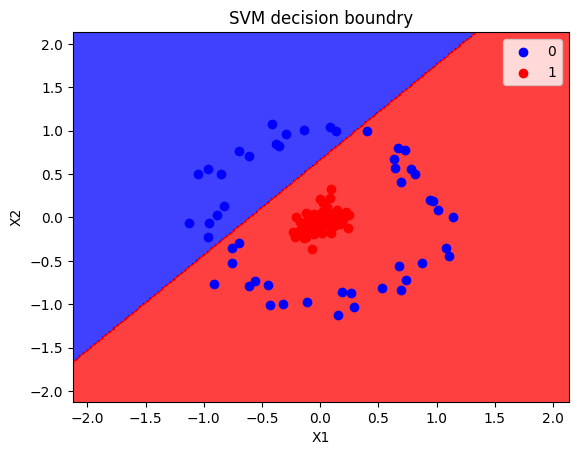

In [10]:
plot_decision_boundry(X,y,classifier)

In [12]:
def plot_3d_plot(X,y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

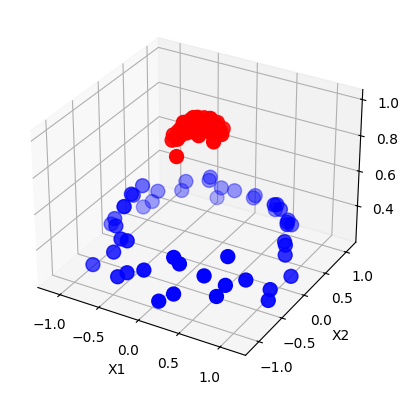

In [13]:
plot_3d_plot(X,y)

In [14]:
rbf_classifier = SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)
y_pred = rbf_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

C:\Users\sanjay\AppData\Local\Temp\ipykernel_5976\2543833994.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


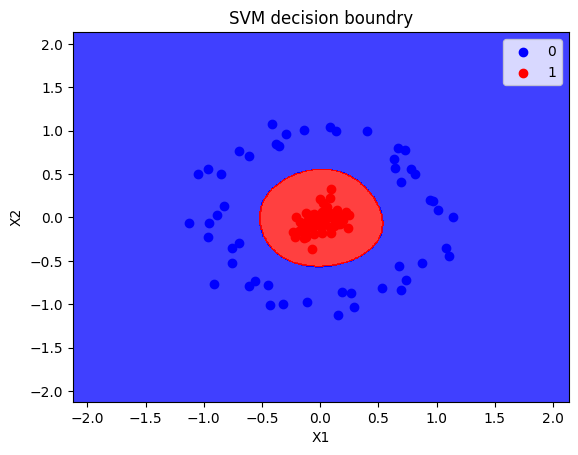

In [15]:
plot_decision_boundry(X,y,rbf_classifier)